# Dataset analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/movie_data.csv', sep=';')
df.describe()

,budget,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count
count,5.465000e+03,5464.000000,5476.000000,5479.000000,5.473000e+03,5472.000000,5460.000000,5463.000000,5468.000000
mean,3.124037e+07,9.256444,2.925676,1.357364,9.071296e+07,110.247442,1.482784,6.287937,724.587052
std,3.912379e+07,6.019158,2.166273,0.772884,1.578984e+08,21.470544,0.921282,0.902441,1193.095062
min,1.000000e+00,0.003013,0.000000,0.000000,1.001800e+04,26.000000,0.000000,0.000000,0.000000
25%,6.000000e+06,5.652154,1.000000,1.000000,8.038061e+06,95.750000,1.000000,5.700000,84.000000
50%,1.800000e+07,8.526302,2.000000,1.000000,3.106304e+07,106.000000,1.000000,6.300000,287.000000
75%,4.000000e+07,11.804164,4.000000,2.000000,1.026162e+08,120.000000,2.000000,6.900000,807.000000
max,3.800000e+08,54.581997,26.000000,12.000000,2.068224e+09,338.000000,9.000000,9.100000,14075.000000


Basic analysis of the dataset.

In [3]:
print(df.info())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5505 entries, 0 to 5504
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5465 non-null   float64
 1   genres                5467 non-null   object 
 2   imdb_id               5460 non-null   object 
 3   original_title        5468 non-null   object 
 4   overview              5460 non-null   object 
 5   popularity            5464 non-null   float64
 6   production_companies  5476 non-null   float64
 7   production_countries  5479 non-null   float64
 8   release_date          5473 non-null   object 
 9   revenue               5473 non-null   float64
 10  runtime               5472 non-null   float64
 11  spoken_languages      5460 non-null   float64
 12  vote_average          5463 non-null   float64
 13  vote_count            5468 non-null   float64
dtypes: float64(9), object(5)
memory usage: 602.2+ KB
None


In [4]:
# Amount of movies
print('Amount of movies: {}'.format(len(df)))

Amount of movies: 5505


In [5]:
df.isnull().sum()

budget                  40
genres                  38
imdb_id                 45
original_title          37
overview                45
popularity              41
production_companies    29
production_countries    26
release_date            32
revenue                 32
runtime                 33
spoken_languages        45
vote_average            42
vote_count              37
dtype: int64

In [28]:
df = df.dropna()
df.isnull().sum()

budget                  0
genres                  0
imdb_id                 0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
vote_average            0
vote_count              0
dtype: int64

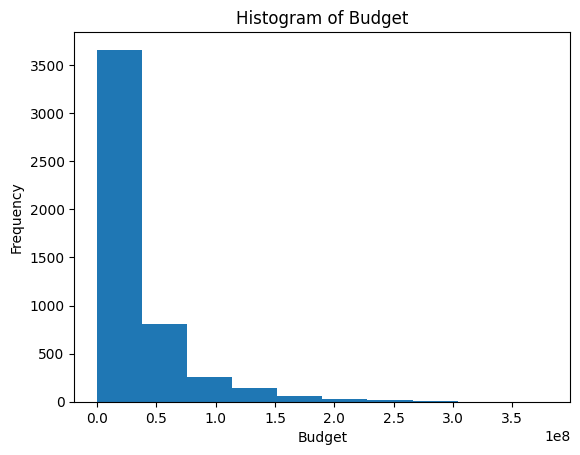

In [27]:
plt.hist(df['budget'], bins=10)
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Histogram of Budget')
plt.show()

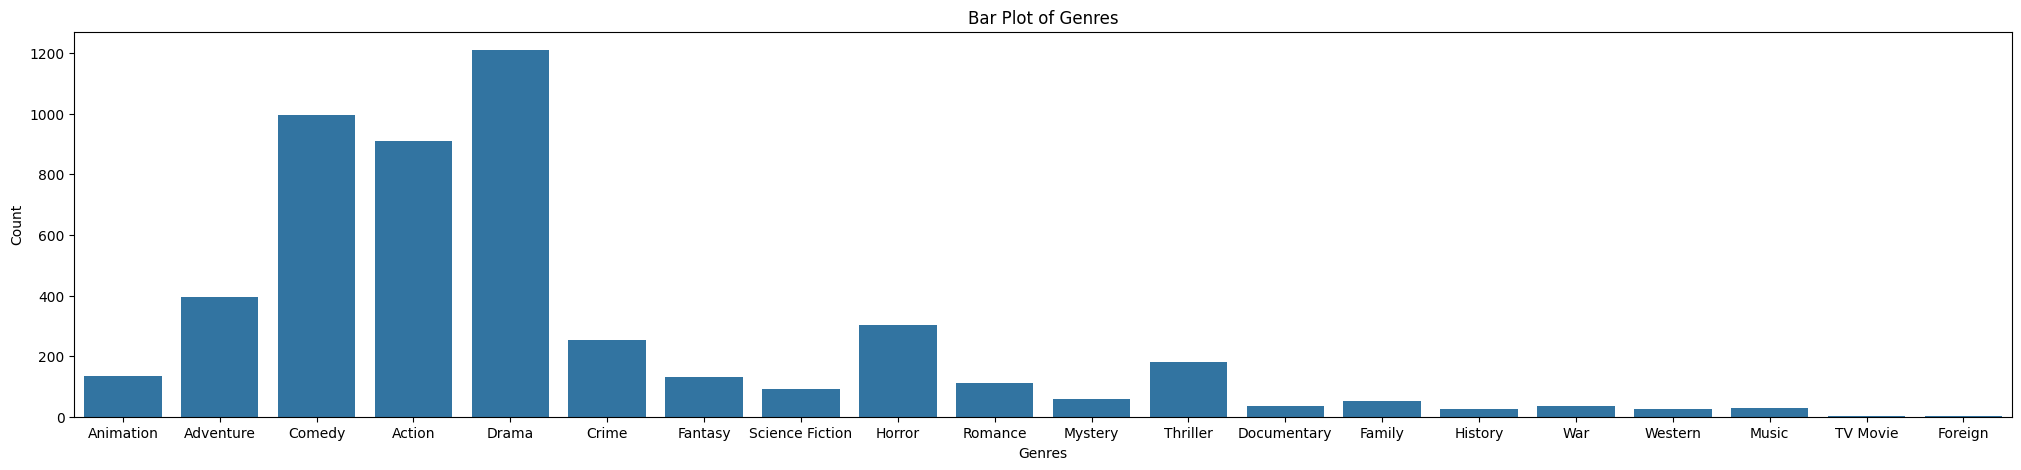

In [13]:
plt.figure(figsize=(25,5)) # set figure size
ax = sns.countplot(x='genres', data=df)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Bar Plot of Genres')
plt.show()

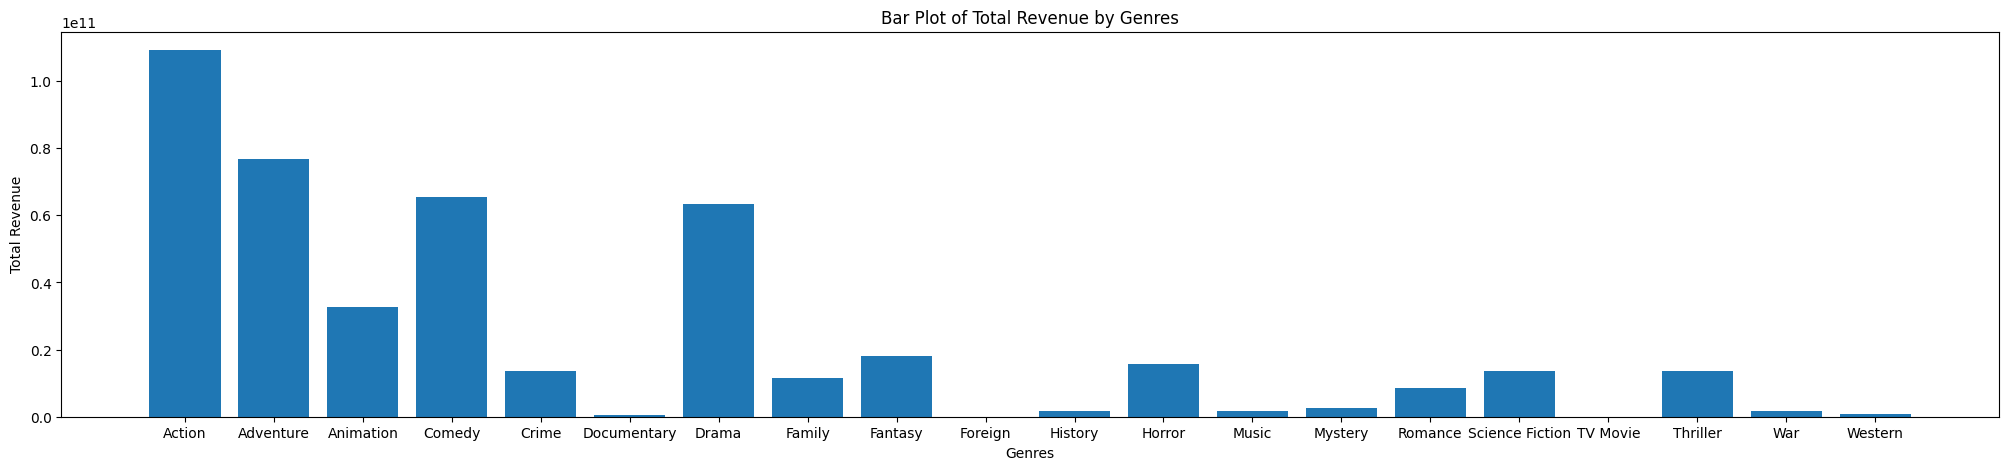

In [14]:
revenue_by_genre = df.groupby('genres')['revenue'].sum()

plt.figure(figsize=(25,5)) # set figure size
# Create the bar plot
plt.bar(revenue_by_genre.index, revenue_by_genre)
plt.xlabel('Genres')
plt.ylabel('Total Revenue')
plt.title('Bar Plot of Total Revenue by Genres')

# Show the plot
plt.show()

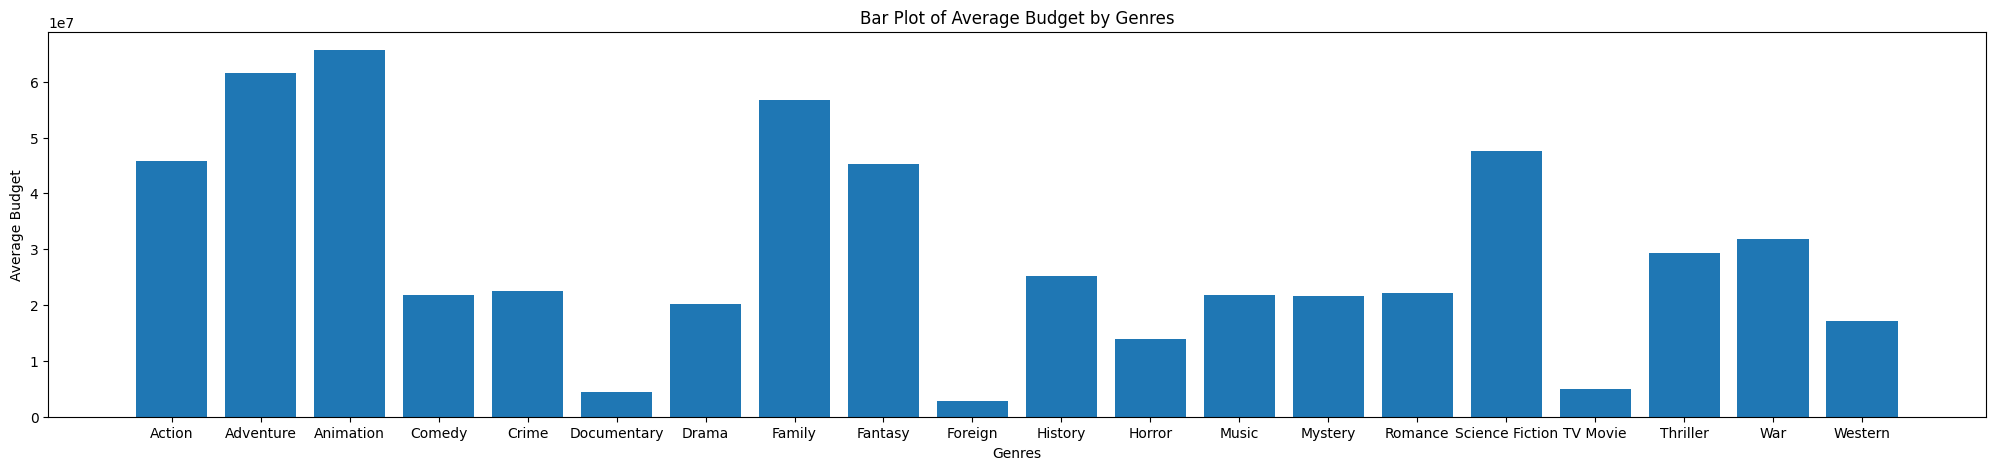

In [15]:
# Group the data by 'genres' and calculate the mean of the 'budget' feature for each group
budget_by_genre = df.groupby('genres')['budget'].mean()

# Create the bar plot
plt.figure(figsize=(25,5))
plt.bar(budget_by_genre.index, budget_by_genre)
plt.xlabel('Genres')
plt.ylabel('Average Budget')
plt.title('Bar Plot of Average Budget by Genres')

# Show the plot
plt.show()

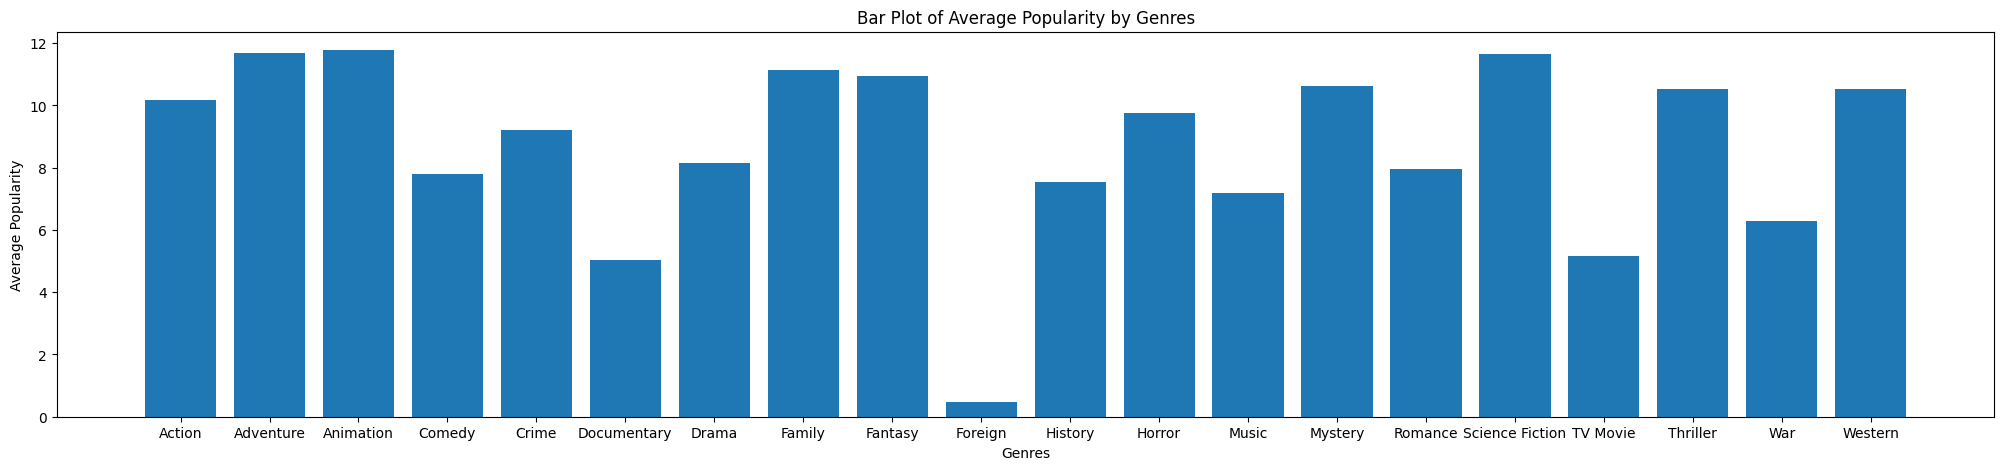

In [16]:
popularity_by_genre = df.groupby('genres')['popularity'].mean()

# Create the bar plot
plt.figure(figsize=(25,5))
plt.bar(popularity_by_genre.index, popularity_by_genre)
plt.xlabel('Genres')
plt.ylabel('Average Popularity')
plt.title('Bar Plot of Average Popularity by Genres')

# Show the plot
plt.show()

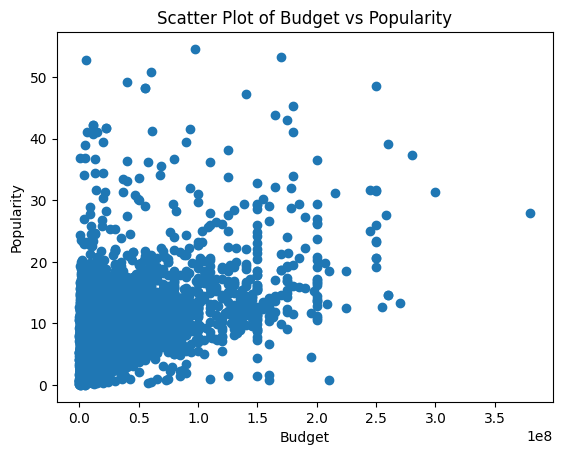

In [17]:
plt.scatter(df['budget'], df['popularity'])
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.title('Scatter Plot of Budget vs Popularity')
plt.show()

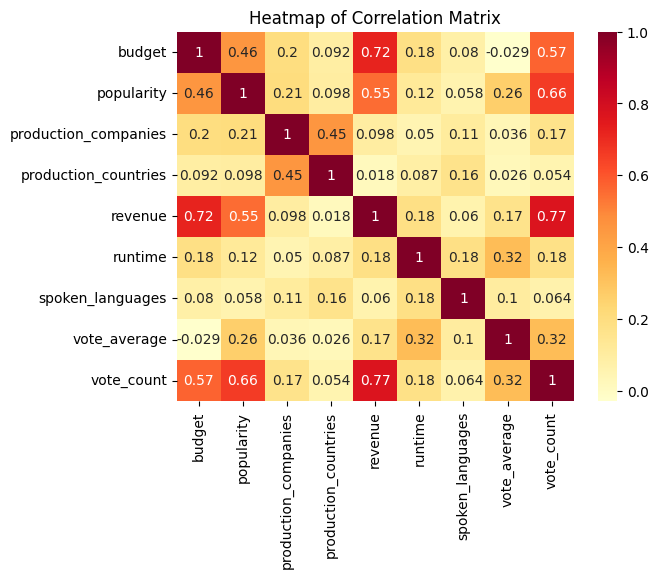

In [18]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap="YlOrRd")
plt.title('Heatmap of Correlation Matrix')
plt.show()

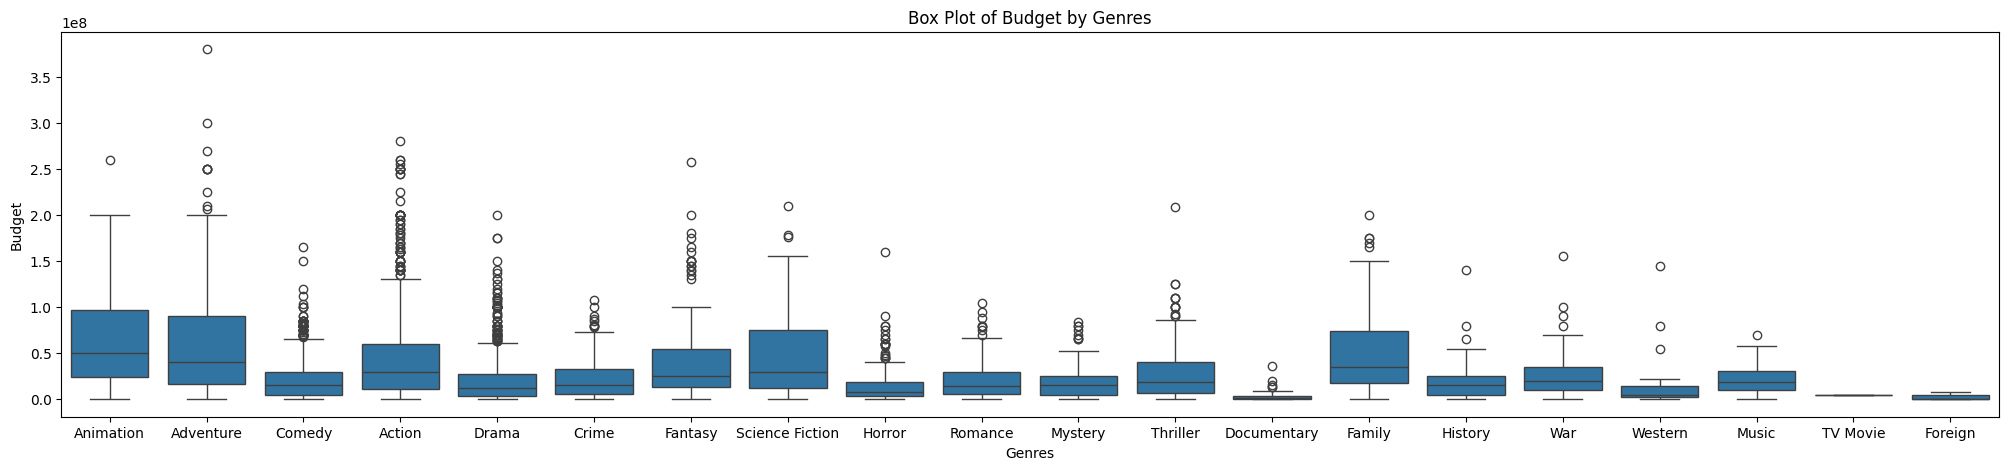

In [18]:
plt.figure(figsize=(25,5)) # set figure size
sns.boxplot(x='genres', y='budget', data=df)
plt.xlabel('Genres')
plt.ylabel('Budget')
plt.title('Box Plot of Budget by Genres')
plt.show()

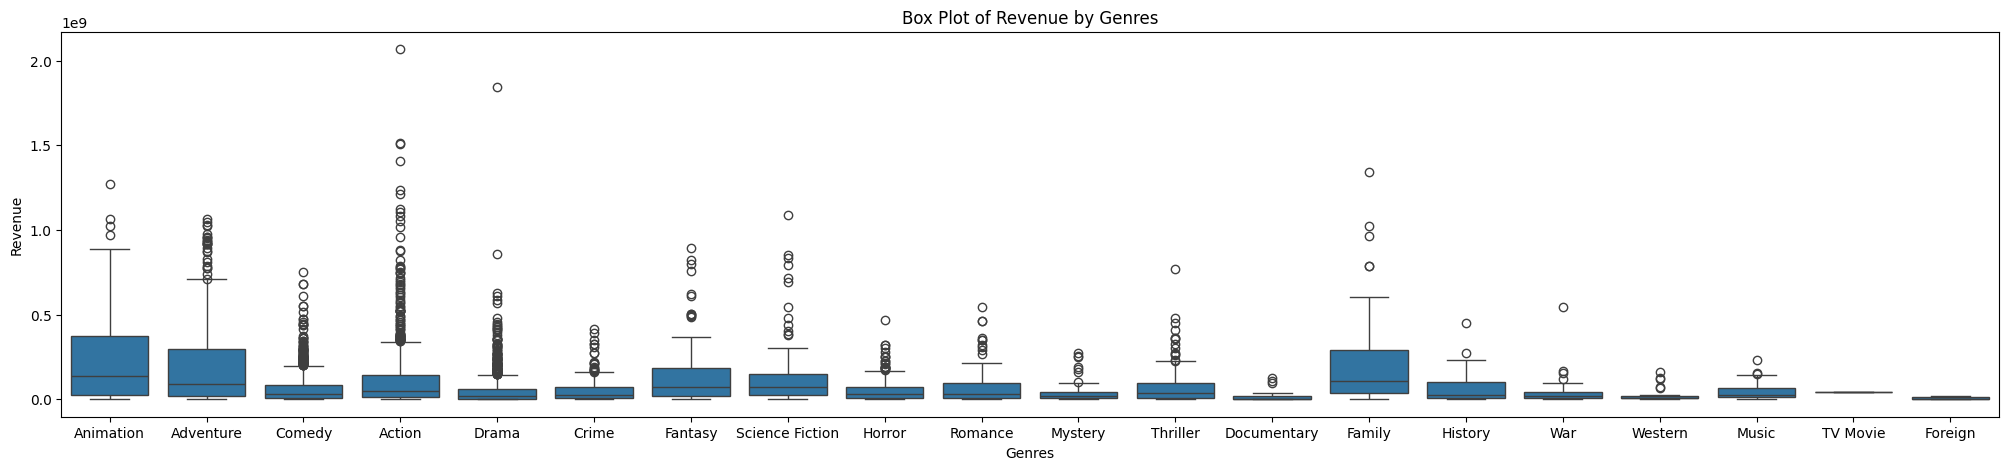

In [20]:
plt.figure(figsize=(25,5))
sns.boxplot(x='genres', y='revenue', data=df)
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.title('Box Plot of Revenue by Genres')
plt.show()

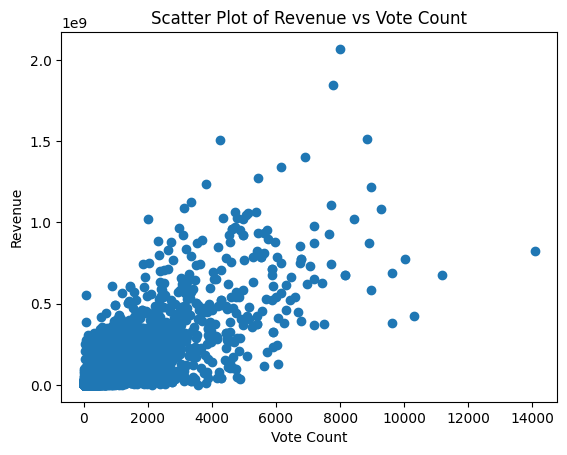

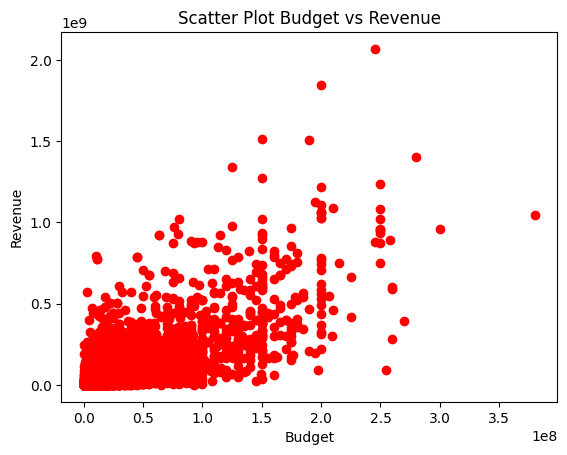

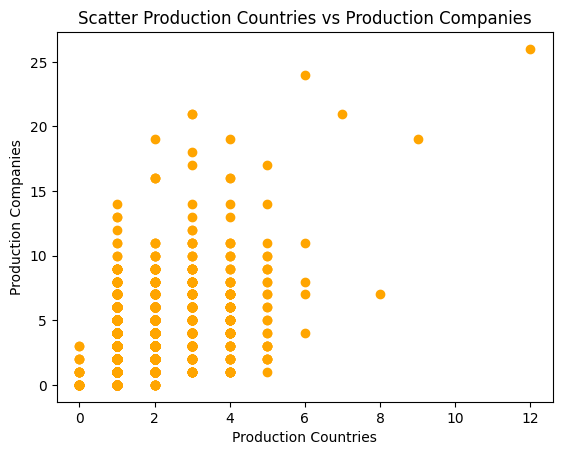

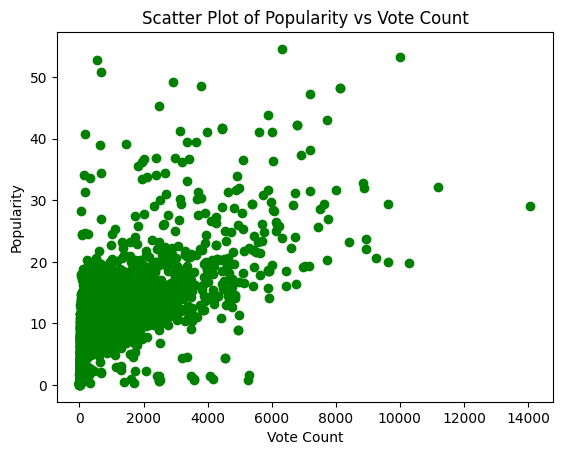

In [21]:
plt.scatter(df['vote_count'], df['revenue'])
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Revenue vs Vote Count')
plt.show()

plt.scatter(df['budget'], df['revenue'], c='red')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Scatter Plot Budget vs Revenue')
plt.show()

plt.scatter(df['production_countries'], df['production_companies'], c='orange')
plt.xlabel('Production Countries')
plt.ylabel('Production Companies')
plt.title('Scatter Production Countries vs Production Companies')
plt.show()

plt.scatter(df['vote_count'], df['popularity'], c='green')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.title('Scatter Plot of Popularity vs Vote Count')
plt.show()

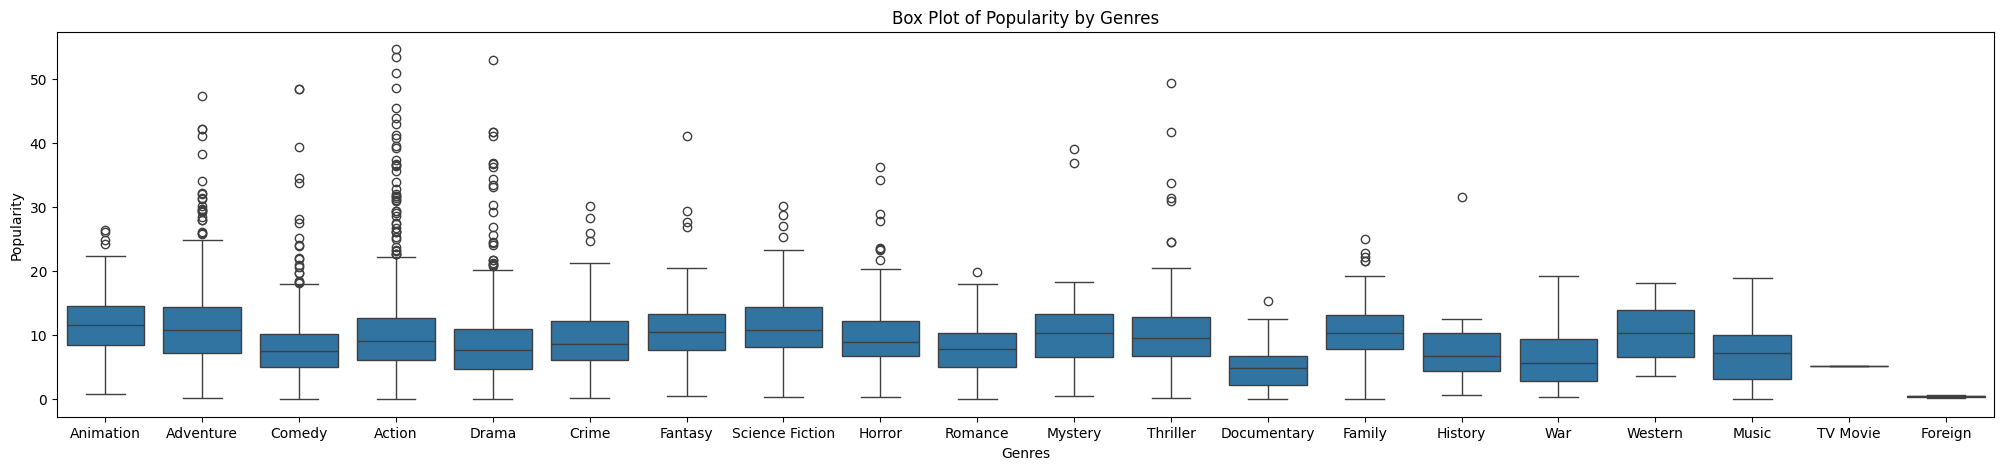

In [22]:
plt.figure(figsize=(25,5)) # set figure size
sns.boxplot(x='genres', y='popularity', data=df)
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.title('Box Plot of Popularity by Genres')
plt.show()

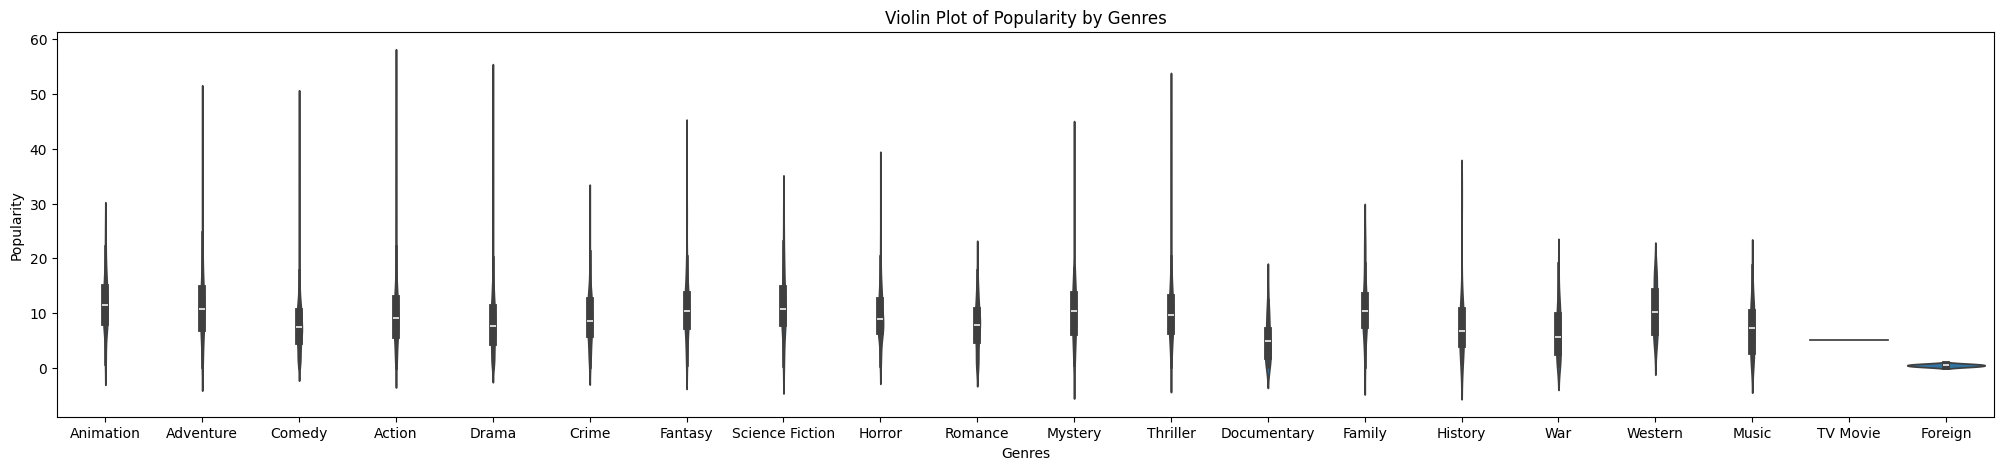

In [23]:
plt.figure(figsize=(25,5)) # set figure size
sns.violinplot(x='genres', y='popularity', data=df)
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.title('Violin Plot of Popularity by Genres')
plt.show()

## Exporting the subset(Action, Comedy, Drama)

In [24]:
subset = df[df['genres'].isin(['Action', 'Comedy', 'Drama'])]
subset.head()

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
2,16000000.0,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1.0,1.0,1995-12-22,81452156.0,127.0,1.0,6.1,34.0
3,60000000.0,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,3.0,1.0,1995-12-15,187436818.0,170.0,2.0,7.7,1886.0
4,35000000.0,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,5.231580,3.0,1.0,1995-12-22,64350171.0,106.0,1.0,5.5,174.0
6,62000000.0,Comedy,tt0112346,The American President,"Widowed U.S. president Andrew Shepherd, one of...",6.318445,2.0,1.0,1995-11-17,107879496.0,106.0,1.0,6.5,199.0
8,98000000.0,Action,tt0112760,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",7.284477,4.0,4.0,1995-12-22,10017322.0,119.0,2.0,5.7,137.0


In [26]:
subset.to_csv('data/filtered_movie_data.csv', sep=';', index=False)